In [1]:
# Importar librerías necesarias
import numpy as np
# Constantes y valores de referencia
R=8.314
T_R=298.15
P_R=1e5
# Calculo prop. termodinamicas CO2
# Condiciones
T = 500
P = 5e6
# Datos tabulados
S0 = 213.8
DFH0 = -393.5e3
# Crear la una variable con los coeficientes en el orden que aparecen en tablas
ACP_tabla = np.array([19.8, 0.07344, -5.602e-5, 1.715e-8])
# Invertir para trabajar con polinomios en potencias en orden decreciente
ACP = ACP_tabla[::-1]

In [2]:
# Calculo entalpia
ACPi = np.polyint(ACP);
HIG = DFH0 + np.polyval(ACPi, T) - np.polyval(ACPi, T_R)
print('H^ig(', T, 'K ) = ', HIG.round(0)/1000, 'kJ/mol')

H^ig( 500 K ) =  -385.193 kJ/mol


In [3]:
# Calculo entropia
ACPTi = np.polyint(ACP[0:-1])  # Para integrar el término independiente aparte
SIG = S0 + ACP[-1] * np.log(T/T_R) + np.polyval(ACPTi, T)-np.polyval(ACPTi, T_R)-R*np.log(P/P_R)
VIG = R*T/P
GIG = HIG-T*SIG

In [4]:
# Imprime propiedades
print('Propiedades del CO2 a P =', P/1e5, 'bar,  T = ', T, 'K')
print('S^ig = ', SIG.round(1), 'J/mol K')
print('H^ig = ', HIG.round(-1)/1000, 'kJ/mol')
print('G^ig = ', GIG.round(0)/1000, 'kJ/mol')

Propiedades del CO2 a P = 50.0 bar,  T =  500 K
S^ig =  202.4 J/mol K
H^ig =  -385.19 kJ/mol
G^ig =  -486.386 kJ/mol


In [5]:
# Crea un vector de temperaturas
T = np.linspace(200, 1000)
# Calcula H y S como gas ideal en función de T
HIG = DFH0 + np.polyval(ACPi, T)-np.polyval(ACPi, T_R)
ACPTi = np.polyint(ACP[0:-1])  # Para integrar sin el término independiente
SIG = S0 + ACP[-1]*np.log(T/T_R)+np.polyval(ACPTi, T)-np.polyval(ACPTi, T_R)-R*np.log(P/P_R)

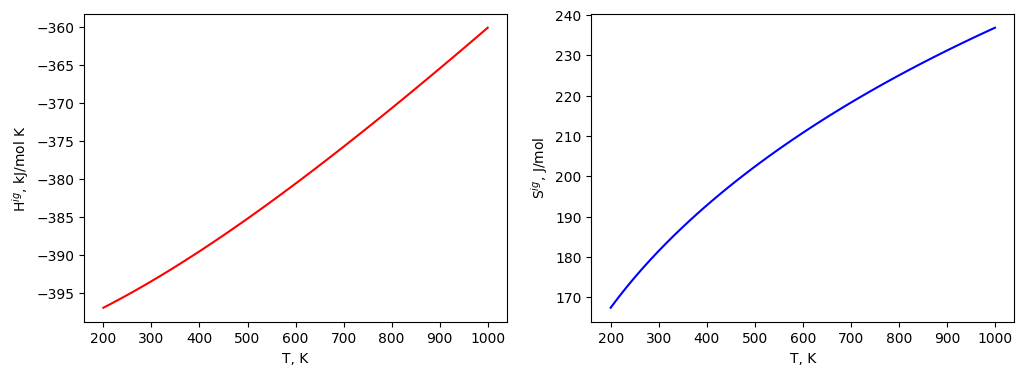

In [6]:
import matplotlib.pyplot as plt
# Importa librería para gráficos
# Representa Hig y Sig
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(T, HIG/1000, 'r', label="H^ig")
axes[0].set_xlabel('T, K')
axes[0].set_ylabel('H$^{ig}$, kJ/mol K')
axes[1].plot(T, SIG, 'b', label="S^ig")
axes[1].set_xlabel('T, K')
axes[1].set_ylabel('S$^{ig}$, J/mol')
plt.show()

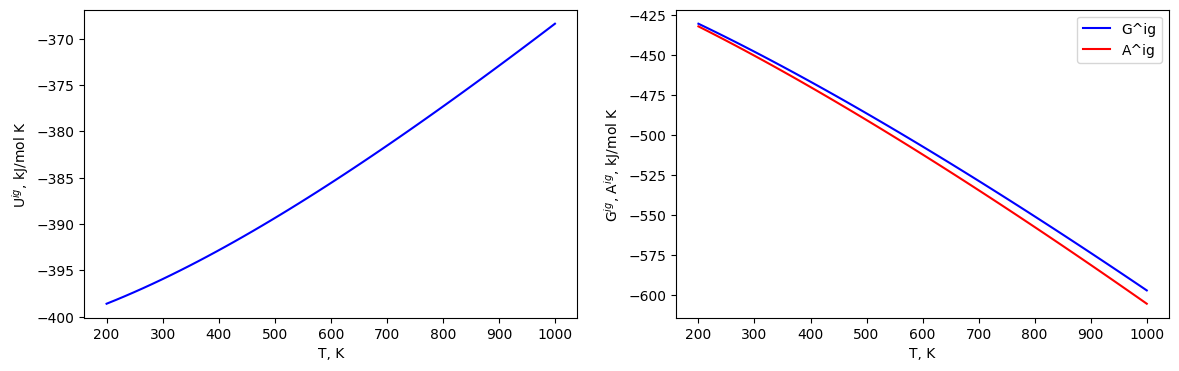

In [7]:
# Representa el resto de propiedades: Uig, Gig, Aig
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 4))
# Figura un poco más ancha para que estén separadas
axes2[0].plot(T, (HIG-R*T)/1000,  'b', label="U$^{ig}")
axes2[0].set_xlabel('T, K')
axes2[0].set_ylabel('U$^{ig}$, kJ/mol K')
axes2[1].plot(T, (HIG-T*SIG)/1000, 'b', label="G^ig")
axes2[1].plot(T, (HIG-R*T-T*SIG)/1000, 'r', label="A^ig")
axes2[1].legend()
axes2[1].set_xlabel('T, K')
axes2[1].set_ylabel('G$^{ig}$, A$^{ig}$, kJ/mol K')
plt.show()